In [1]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(5)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from numpy import array

In [2]:
data = pd.read_csv("../data/BTCL.csv")
data

,DateTime,BTCL
0,2020-04-23 06:34:02,158
1,2020-04-23 09:34:02,158
2,2020-04-24 06:34:01,158
3,2020-04-24 09:34:02,158
4,2020-04-27 06:33:57,158
...,...,...
2497,2022-07-14 04:55:53,656
2498,2022-07-14 05:55:54,625
2499,2022-07-14 07:55:52,625
2500,2022-07-14 08:55:53,625


In [3]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','BTCL':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,158
1,2020-04-23,158
2,2020-04-24,158
3,2020-04-24,158
4,2020-04-27,158
...,...,...
2497,2022-07-14,656
2498,2022-07-14,625
2499,2022-07-14,625
2500,2022-07-14,625


In [4]:
data = data.groupby('date').mean()
data

,price
date,
2020-04-23,158.0
2020-04-24,158.0
2020-04-27,158.0
2020-04-28,158.0
2020-04-29,158.0
...,...
2022-07-11,625.0
2022-07-12,625.0
2022-07-13,625.0


In [5]:
data1=data.reset_index()['price']
data1

0      158.0
1      158.0
2      158.0
3      158.0
4      158.0
       ...  
543    625.0
544    625.0
545    625.0
546    637.4
547    625.0
Name: price, Length: 548, dtype: float64

In [6]:
print("Size of the dataset: ",data1.shape)
print("Checking for null values:\n",data1.isnull().sum())
print("Checking Data-type of each column:\n",data1.dtypes)

Size of the dataset:  (548,)
Checking for null values:
 0
Checking Data-type of each column:
 float64


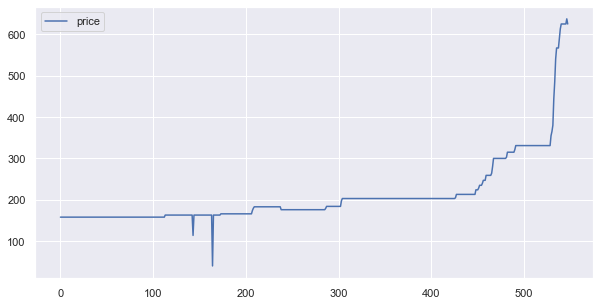

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data1,label='price')
plt.legend()
plt.show()

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [9]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [10]:
len(train_data)

356

In [11]:
training_size,test_size

(356, 192)

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
import numpy
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(345, 10)
(345,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(181, 10)
(181,)


(None, None)

In [16]:
X_train.shape[1]

10

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
model=Sequential()
model.add(GRU(64,activation='relu', return_sequences=False,input_shape=(time_step,1)))
#model.add(GRU(128,activation='relu'))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#model.summary()

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,verbose=2)

Epoch 1/200
11/11 - 5s - loss: 0.0181 - val_loss: 0.0098 - 5s/epoch - 453ms/step
Epoch 2/200
11/11 - 0s - loss: 0.0024 - val_loss: 0.0446 - 143ms/epoch - 13ms/step
Epoch 3/200
11/11 - 0s - loss: 0.0013 - val_loss: 0.0235 - 130ms/epoch - 12ms/step
Epoch 4/200
11/11 - 0s - loss: 7.2687e-04 - val_loss: 0.0283 - 140ms/epoch - 13ms/step
Epoch 5/200
11/11 - 0s - loss: 4.6166e-04 - val_loss: 0.0270 - 140ms/epoch - 13ms/step
Epoch 6/200
11/11 - 0s - loss: 4.2042e-04 - val_loss: 0.0245 - 186ms/epoch - 17ms/step
Epoch 7/200
11/11 - 0s - loss: 3.9320e-04 - val_loss: 0.0227 - 152ms/epoch - 14ms/step
Epoch 8/200
11/11 - 0s - loss: 3.7160e-04 - val_loss: 0.0204 - 153ms/epoch - 14ms/step
Epoch 9/200
11/11 - 0s - loss: 3.5292e-04 - val_loss: 0.0184 - 144ms/epoch - 13ms/step
Epoch 10/200
11/11 - 0s - loss: 3.2336e-04 - val_loss: 0.0174 - 142ms/epoch - 13ms/step
Epoch 11/200
11/11 - 0s - loss: 2.9839e-04 - val_loss: 0.0151 - 140ms/epoch - 13ms/step
Epoch 12/200
11/11 - 0s - loss: 2.6884e-04 - val_loss: 

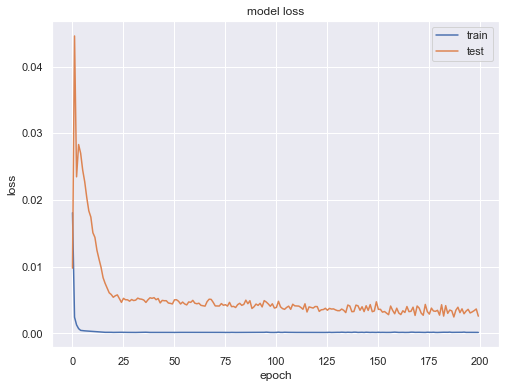

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [22]:
rstrain_predict=scaler.inverse_transform(train_predict)
rstest_predict=scaler.inverse_transform(test_predict)
rsytest=scaler.inverse_transform(np.array(ytest).reshape(-1,1))
rsytrain=scaler.inverse_transform(np.array(y_train).reshape(-1,1))

In [23]:
RMSE_train=math.sqrt(mean_squared_error(rsytrain,rstrain_predict))
print(RMSE_train)

8.052618908701284


In [24]:
RMSE_test=math.sqrt(mean_squared_error(rsytest,rstest_predict))
MAE_test=mean_absolute_error(rsytest,rstest_predict)
R2_test=r2_score(rsytest,rstest_predict)
print("RMSE:", RMSE_test)
print("MAE:", MAE_test)
print("R-Squared:", R2_test)

RMSE: 30.45214493396852
MAE: 17.822681119297073
R-Squared: 0.9181623332481573


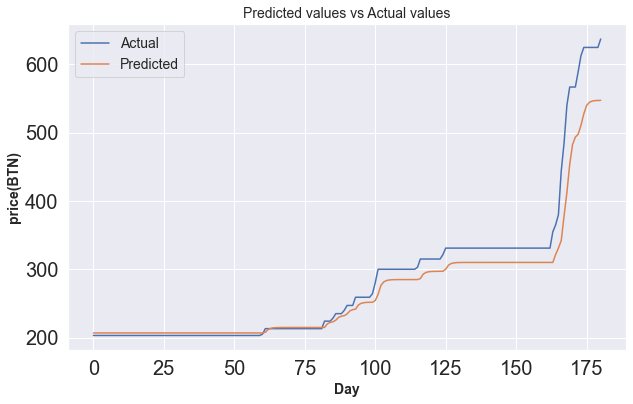

In [54]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(10, 6)

ax.plot(rsytest,label = "Actual")
ax.plot(rstest_predict,label = "Predicted")

ax.set_xlabel('Day', fontsize=14, fontweight='bold')
ax.set_ylabel('price(BTN)', fontsize=14, fontweight='bold')

# Set x and y ticks
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.title('Predicted values vs Actual values', fontsize = 14)
ax.legend(fontsize = 14)
plt.show()

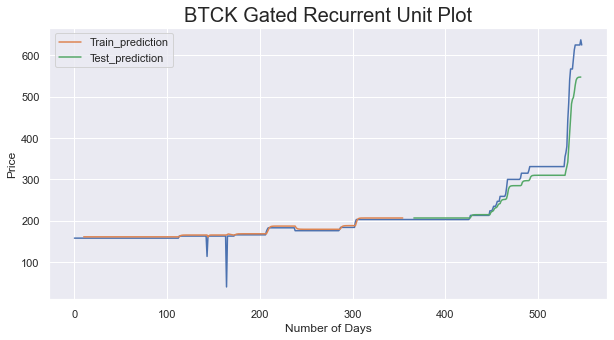

In [26]:
look_back=10
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = rstrain_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = rstest_predict
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.title('BTCK Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [27]:
len(test_data)

192

In [28]:
x_input=test_data[182:].reshape(1,-1)
x_input.shape

(1, 10)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.9196518245731502,
 0.959156344158018,
 0.9792433880147304,
 0.9792433880147304,
 0.9792433880147304,
 0.9792433880147304,
 0.9792433880147304,
 0.9792433880147304,
 1.0,
 0.9792433880147304]

In [30]:
lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [31]:
forecast_rescaled=scaler.inverse_transform(lst_output)

In [32]:
forecast_rescaled

array([[549.81296542],
       [510.52800281],
       [476.32548604],
       [446.32786051],
       [419.96981655],
       [396.78731313],
       [376.38122224],
       [358.34273056],
       [342.42290386],
       [328.37387614],
       [315.96768618],
       [305.00717349],
       [295.31818026],
       [286.7521863 ],
       [279.17989962],
       [272.48780252],
       [266.57950463],
       [261.3635651 ],
       [256.75862006],
       [252.69345388],
       [249.10386568],
       [245.93420044],
       [243.13560424],
       [240.66403021],
       [238.48130677],
       [236.55374893],
       [234.85119687],
       [233.34733642],
       [232.01891568],
       [230.84538893]])

In [33]:
day_new=np.arange(0,547)
day_pred=np.arange(547,577)

In [34]:
forecast = pd.DataFrame(forecast_rescaled, columns = ['predicted_price'])
forecast.head()

,predicted_price
0,549.812965
1,510.528003
2,476.325486
3,446.327861
4,419.969817


In [35]:
data

,price
date,
2020-04-23,158.0
2020-04-24,158.0
2020-04-27,158.0
2020-04-28,158.0
2020-04-29,158.0
...,...
2022-07-11,625.0
2022-07-12,625.0
2022-07-13,625.0


In [36]:
forecast['date'] = pd.date_range(start='2022-07-15', periods=30, freq='D')
forecast.head()

,predicted_price,date
0,549.812965,2022-07-15
1,510.528003,2022-07-16
2,476.325486,2022-07-17
3,446.327861,2022-07-18
4,419.969817,2022-07-19


In [37]:
forecast = forecast.set_index('date')
forecast

,predicted_price
date,
2022-07-15,549.812965
2022-07-16,510.528003
2022-07-17,476.325486
2022-07-18,446.327861
2022-07-19,419.969817
2022-07-20,396.787313
2022-07-21,376.381222
2022-07-22,358.342731
2022-07-23,342.422904


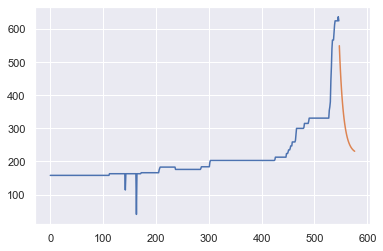

In [38]:
plt.plot(day_new,scaler.inverse_transform(data1[1:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

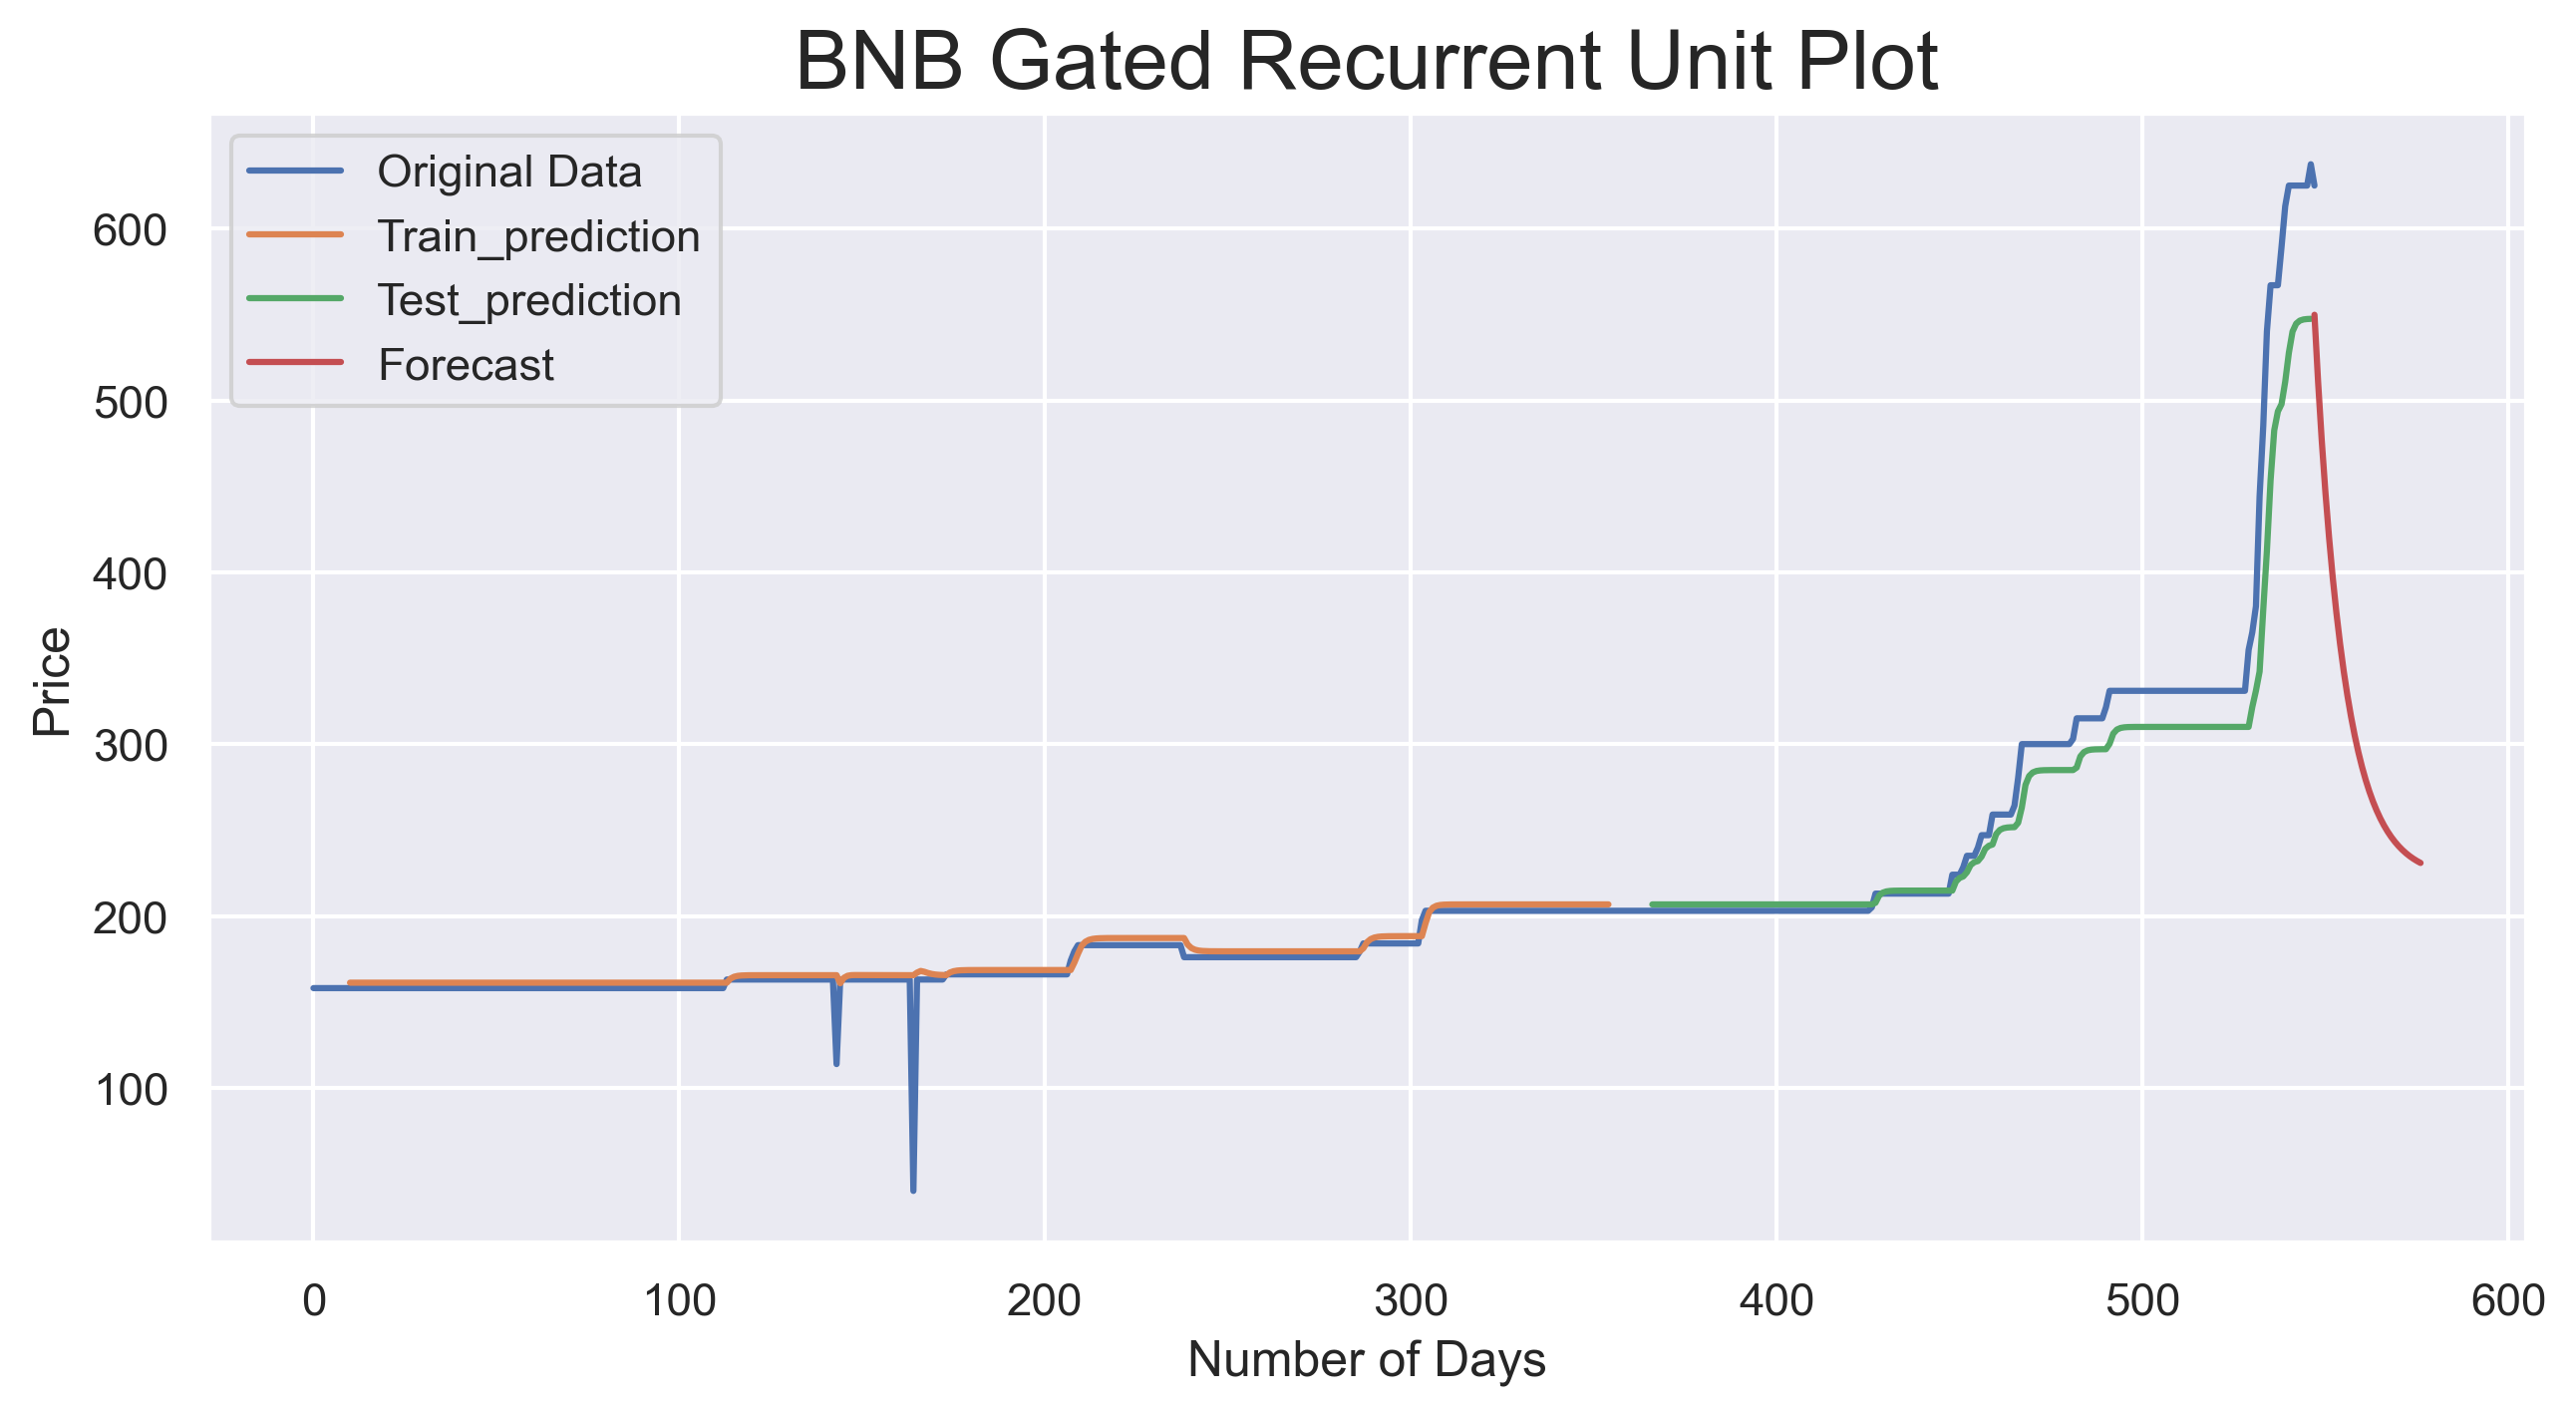

In [39]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(scaler.inverse_transform(data1), label='Original Data')
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.plot(day_pred,scaler.inverse_transform(lst_output), label='Forecast')
plt.title('BNB Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [40]:
forecast = forecast.to_csv('predictedData/btcl_gru_forecast.csv')

In [41]:
len(day_pred)

30

In [42]:
len(forecast_rescaled)

30

In [43]:
len(testPredictPlot)

548

In [44]:
np.count_nonzero(np.isnan(testPredictPlot))

367

In [45]:
#convert numpy array to DF
test = pd.DataFrame(testPredictPlot, columns = ['predicted_price'])
test.head

<bound method NDFrame.head of      predicted_price
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
..               ...
543       546.414185
544       547.090698
545       547.350708
546       547.451660
547              NaN

[548 rows x 1 columns]>

In [46]:
test.isnull().sum()

predicted_price    367
dtype: int64

In [47]:
test = test.dropna()
test

,predicted_price
366,206.709351
367,206.709351
368,206.709351
369,206.709351
370,206.709351
...,...
542,544.654480
543,546.414185
544,547.090698
545,547.350708


In [48]:
size = int(len(data) * 0.65)
size

356

In [49]:
#to know the date of test data
data.iloc[355+10:]  #10 for that time steps

,price
date,
2021-10-13,203.0
2021-10-14,203.0
2021-10-18,203.0
2021-10-19,203.0
2021-10-20,203.0
...,...
2022-07-11,625.0
2022-07-12,625.0
2022-07-13,625.0


In [50]:
test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')
test

C:\Users\Asus\AppData\Local\Temp/ipykernel_3560/531574769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')


,predicted_price,date
366,206.709351,2021-10-15
367,206.709351,2021-10-16
368,206.709351,2021-10-17
369,206.709351,2021-10-18
370,206.709351,2021-10-19
...,...,...
542,544.654480,2022-04-09
543,546.414185,2022-04-10
544,547.090698,2022-04-11
545,547.350708,2022-04-12


In [51]:
col = ['date','predicted_price']
test = test[col]
test

,date,predicted_price
366,2021-10-15,206.709351
367,2021-10-16,206.709351
368,2021-10-17,206.709351
369,2021-10-18,206.709351
370,2021-10-19,206.709351
...,...,...
542,2022-04-09,544.654480
543,2022-04-10,546.414185
544,2022-04-11,547.090698
545,2022-04-12,547.350708


In [52]:
test = test.set_index('date')

In [53]:
test = test.to_csv('predictedData/btcl_gru_testPred.csv')